In [1]:
# Importing required libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Initializing the CNN
model = Sequential()

# Step 1 - Convolution Layer
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening Layer
model.add(Flatten())

# Full connection (Neural Network)
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax')) # output layer with 4 neurons for 4 classes


In [3]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_dirct = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r"C:\Users\gajan\Downloads\rice_leaf_diseases\Train_data",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r"C:\Users\gajan\Downloads\rice_leaf_diseases\Test_data",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_dir = test_dirct.flow_from_directory(r"C:\Users\gajan\Downloads\rice_leaf_diseases\live_data")
                                       

Found 84 images belonging to 3 classes.
Found 36 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [5]:
training_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [6]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

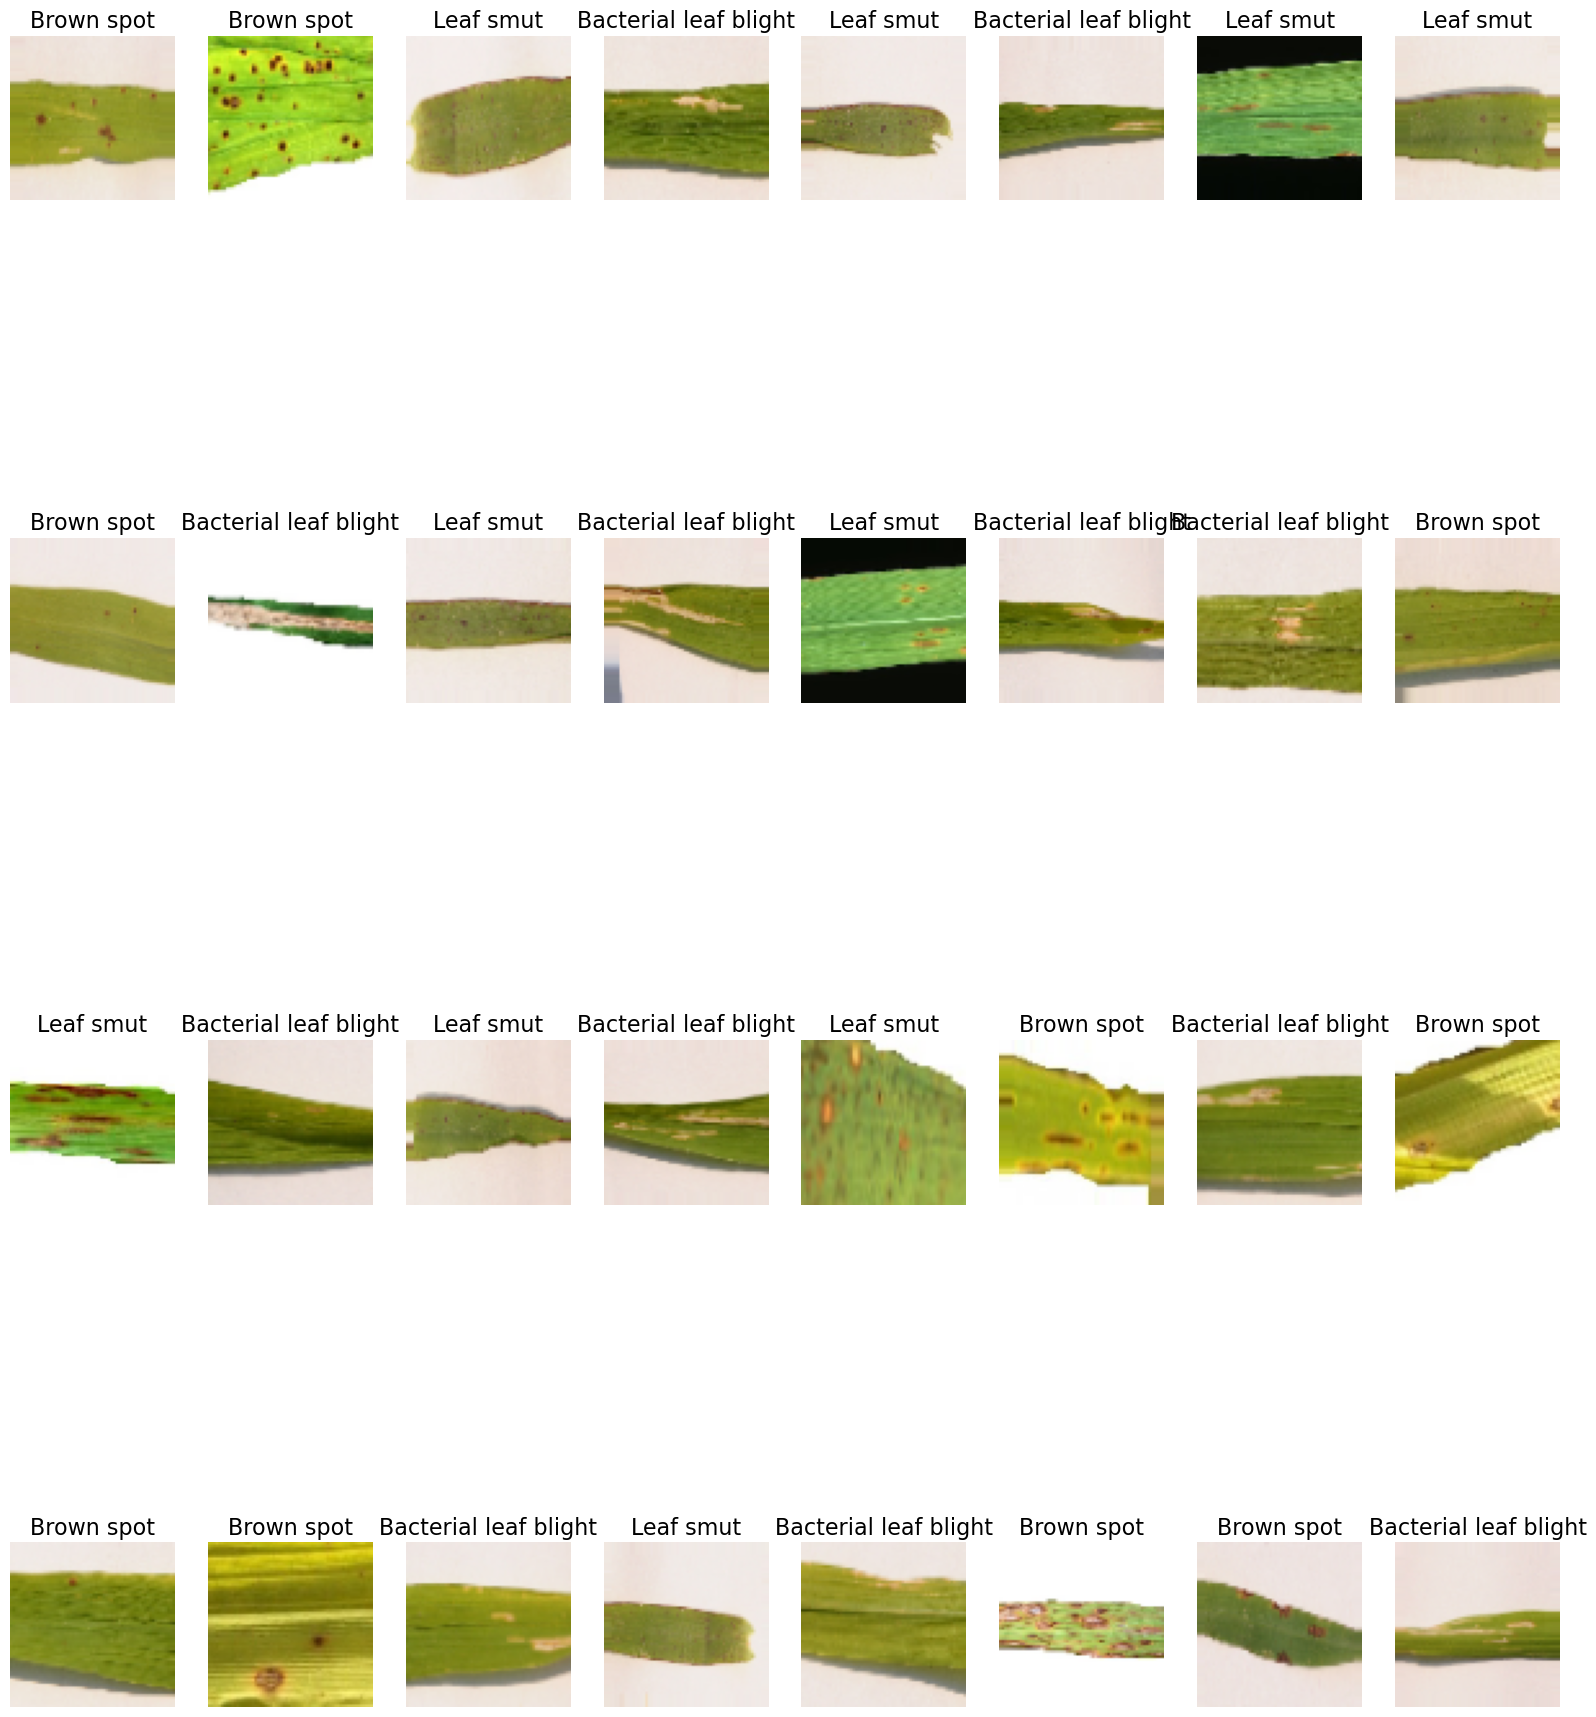

In [7]:
imgs, labels = next(training_set)
plots(imgs, title = labels)


In [8]:
tf.random.set_seed(32)
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Activation,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import SGD
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu')) # input node
model.add(Dense(3,activation='softmax')) #output node

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)      

In [10]:
from tensorflow.keras import optimizers
model.compile(
    loss='CategoricalCrossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [11]:
import tensorflow as tf
import warnings 
warnings.filterwarnings("ignore")

In [12]:
model.save("model.h5")

In [13]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)      

In [14]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
#import cv2
%matplotlib inline

In [15]:
model=load_model("model.h5")

In [16]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(64, 64))
    img_arr = image.img_to_array(raw_img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0

    # Load the pre-trained model
    model = keras.models.load_model('model.h5')

    # Predict class probabilities
    class_probs = model.predict(img_arr)

    # Get the predicted class label
    predicted_class_idx = np.argmax(class_probs, axis=-1)
    class_labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut'] # replace with actual class labels
    predicted_class_label = class_labels[predicted_class_idx[0]]

    # Display the image and predicted class
    plt.imshow(cv2.imread(path))
    plt.title(predicted_class_label)
    plt.show()

In [17]:
!pip install split-folders

In [18]:
import splitfolders
splitfolders.ratio(r"C:/Users/gajan/Downloads/rice_leaf_diseases", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 121 files [00:00, 240.02 files/s]


In [19]:
import os 
os.chdir(r"C:/Users/gajan/Downloads/rice_leaf_diseases/live_data")

In [20]:
test_dir = (r"C:/Users/gajan/Downloads/rice_leaf_diseases/live_data")

In [21]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=15,
    color_mode='rgb',
    class_mode='categorical')

Found 14 images belonging to 3 classes.


In [22]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 1.0848 - accuracy: 0.6429


[1.0848387479782104, 0.6428571343421936]

1/1 [==============================] - 0s 63ms/step


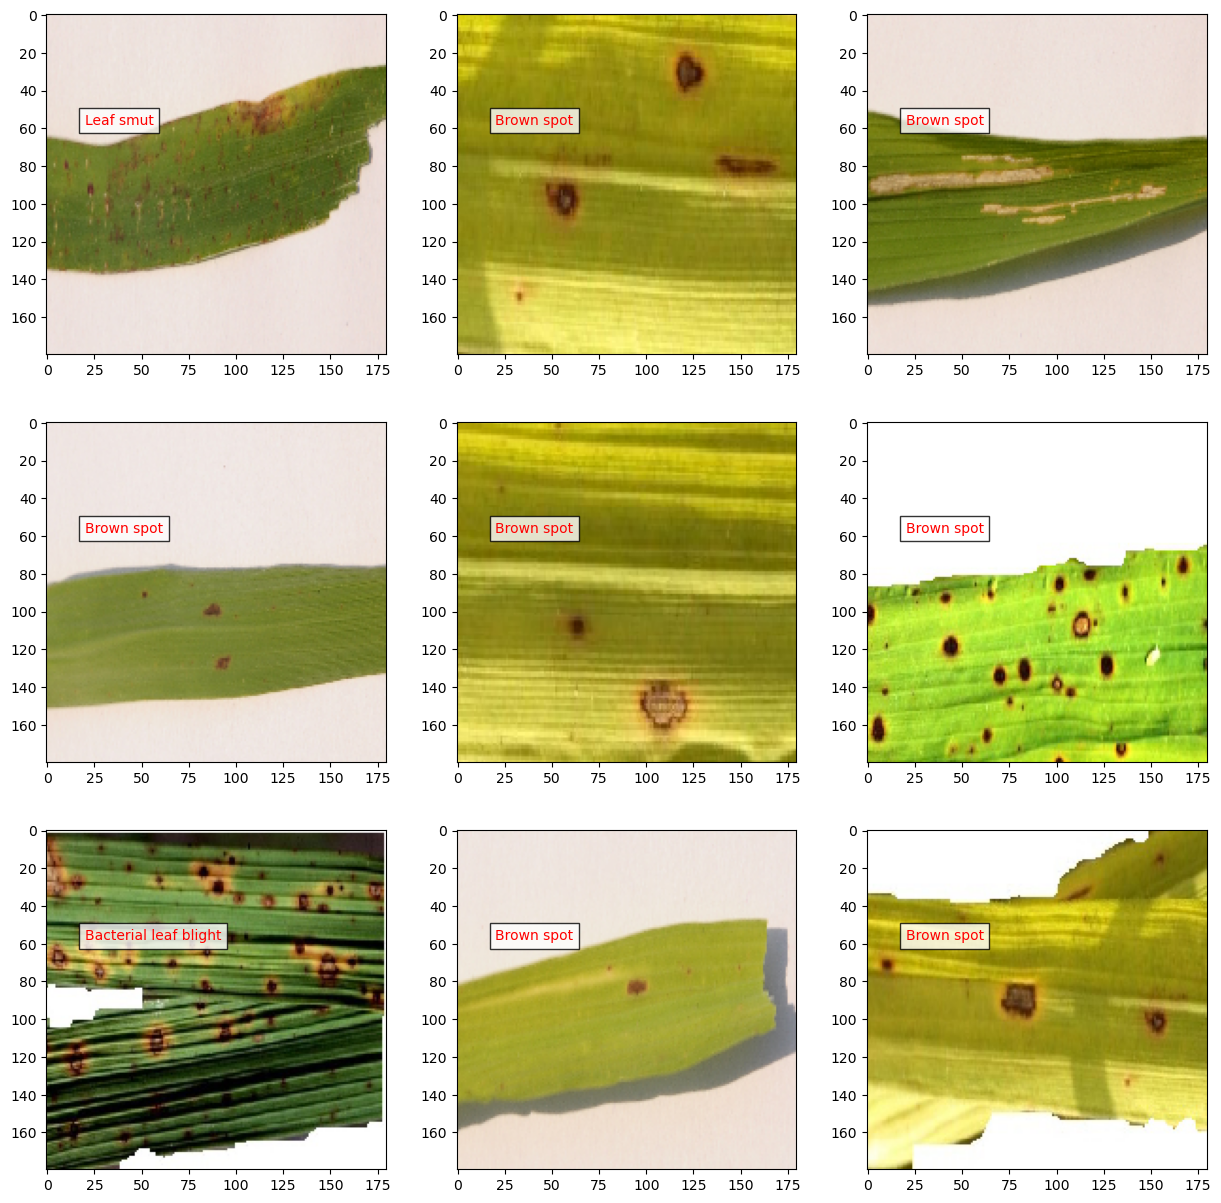

In [23]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])